# My sample to build a simple Neural Network with MXNet

In [3]:
import mxnet as mx
import numpy as np

### To build the sample input data of x

In [15]:
data_size = 50000
eval_ratio = 0.3

In [5]:
random_x = np.random.rand(data_size,10)
random_noise = np.random.rand(data_size)

In [6]:
input_x = mx.nd.array(random_x)
input_noise = mx.nd.array(random_noise)

In [7]:
input_x.asnumpy()

array([[ 0.06848829,  0.20841959,  0.16000363, ...,  0.79086703,
         0.71904951,  0.71404123],
       [ 0.3829312 ,  0.48995924,  0.91594332, ...,  0.43930629,
         0.46538848,  0.70355225],
       [ 0.75994623,  0.9433865 ,  0.19572863, ...,  0.84880257,
         0.58160371,  0.05498484],
       ..., 
       [ 0.00435172,  0.60273767,  0.89202261, ...,  0.20415887,
         0.75057477,  0.28521517],
       [ 0.3333993 ,  0.2978749 ,  0.16671009, ...,  0.94835883,
         0.81689972,  0.50940692],
       [ 0.05279968,  0.24327086,  0.17855528, ...,  0.36282653,
         0.35874125,  0.89399582]], dtype=float32)

In [8]:
input_x_t = input_x.T

In [9]:
input_x_t.asnumpy()

array([[ 0.06848829,  0.3829312 ,  0.75994623, ...,  0.00435172,
         0.3333993 ,  0.05279968],
       [ 0.20841959,  0.48995924,  0.9433865 , ...,  0.60273767,
         0.2978749 ,  0.24327086],
       [ 0.16000363,  0.91594332,  0.19572863, ...,  0.89202261,
         0.16671009,  0.17855528],
       ..., 
       [ 0.79086703,  0.43930629,  0.84880257, ...,  0.20415887,
         0.94835883,  0.36282653],
       [ 0.71904951,  0.46538848,  0.58160371, ...,  0.75057477,
         0.81689972,  0.35874125],
       [ 0.71404123,  0.70355225,  0.05498484, ...,  0.28521517,
         0.50940692,  0.89399582]], dtype=float32)

In [11]:
target_p = mx.nd.array([4, 6.5, 100, 2, -40, -80, 2.46, 1000.34, 0, -8.99])

### Generate target label target_y with input_x_t * target_p + input_noise

In [12]:
target_y = mx.nd.zeros(50000)

for i in range(0,9):
    target_y = target_y + input_x_t[i] * target_p[i]
    
target_y = target_y + input_noise

### Caculate the label of target_y with comparing value of target_y element and mean of target_y

In [13]:
label_y = mx.nd.lesser(target_y,mx.nd.mean(target_y).asscalar())

In [14]:
label_y.asnumpy()

array([ 0.,  1.,  0., ...,  1.,  0.,  1.], dtype=float32)

### seperate the trainning set and evaluating set

In [31]:
train_size = (int)(data_size * (1 - eval_ratio))

train_set_x = input_x[0:train_size] 
eval_set_x = input_x[train_size:data_size]

train_set_y = label_y[0:train_size]
eval_set_y = label_y[train_size:data_size]

### defining the network

In [32]:
data = mx.sym.Variable('data')

fc1 = mx.sym.FullyConnected(data=data, name='fc1',num_hidden=100)

mlp = mx.sym.SoftmaxOutput(data=fc1, name='softmax')


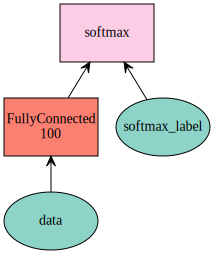

In [33]:
mx.viz.plot_network(symbol=mlp)

In [34]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

model = mx.model.FeedForward(
    symbol = mlp,       # network structure
    num_epoch = 1,     # number of data passes for training 
    learning_rate = 0.1 # learning rate of SGD 
)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: mxnet.model.FeedForward has been deprecated. Please use mxnet.mod.Module instead.


In [35]:
train_iter = mx.io.NDArrayIter(train_set_x, train_set_y)
eval_iter = mx.io.NDArrayIter(eval_set_x, eval_set_y)

In [36]:
model.fit(
    X=train_iter,       # training data
    eval_data=eval_iter, # validation data
    batch_end_callback = mx.callback.Speedometer(100, 200)
)

/home/ubuntu/.local/lib/python2.7/site-packages/mxnet-0.9.4-py2.7.egg/mxnet/model.py:516: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.
  self.initializer(k, v)
INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Batch [200]	Speed: 12169.51 samples/sec	Train-accuracy=0.775000
INFO:root:Epoch[0] Batch [400]	Speed: 12156.48 samples/sec	Train-accuracy=0.880000
INFO:root:Epoch[0] Batch [600]	Speed: 12123.29 samples/sec	Train-accuracy=0.930000
INFO:root:Epoch[0] Batch [800]	Speed: 12082.40 samples/sec	Train-accuracy=0.950000
INFO:root:Epoch[0] Batch [1000]	Speed: 12127.71 samples/sec	Train-accuracy=0.960000
INFO:root:Epoch[0] Batch [1200]	Speed: 12144.95 samples/sec	Train-accuracy=0.945000
INFO:root:Epoch[0] Batch [1400]	Speed: 12145.86 samples/sec	Train-accuracy=0.945000
INFO:root:Epoch[0] Batch [1600]	Speed: 12159.61 samples/sec	Train-accuracy=0.955000
INFO:root:Epoch[0] Batch [1800]	Speed

In [ ]:
model